# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
rng = np.random

In [3]:
print(f"Tensorflow version installed {tf.__version__}")

Tensorflow version installed 2.10.1


In [4]:
print(rng)

<module 'numpy.random' from 'c:\\Users\\erkun\\anaconda3\\envs\\tf\\lib\\site-packages\\numpy\\random\\__init__.py'>


In [5]:
rng.randn()

0.5854229444538173

In [6]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [7]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


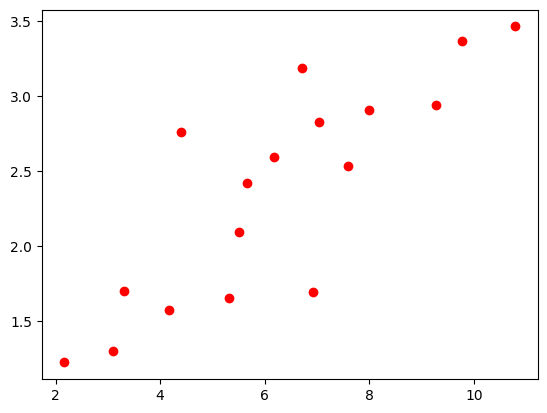

In [8]:
%matplotlib inline
plt.plot(X,Y,'ro', label='Original data')
plt.show()

In [9]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [11]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.271336, W: 0.389040, b: -0.175341
step: 100, loss: 0.245987, W: 0.373316, b: -0.063864
step: 150, loss: 0.226108, W: 0.359391, b: 0.034856
step: 200, loss: 0.210518, W: 0.347060, b: 0.122279
step: 250, loss: 0.198292, W: 0.336140, b: 0.199697
step: 300, loss: 0.188704, W: 0.326470, b: 0.268256
step: 350, loss: 0.181185, W: 0.317906, b: 0.328970
step: 400, loss: 0.175288, W: 0.310322, b: 0.382735
step: 450, loss: 0.170664, W: 0.303606, b: 0.430348
step: 500, loss: 0.167038, W: 0.297659, b: 0.472513
step: 550, loss: 0.164194, W: 0.292392, b: 0.509852
step: 600, loss: 0.161964, W: 0.287728, b: 0.542918
step: 650, loss: 0.160214, W: 0.283598, b: 0.572200
step: 700, loss: 0.158843, W: 0.279940, b: 0.598131
step: 750, loss: 0.157767, W: 0.276701, b: 0.621095
step: 800, loss: 0.156924, W: 0.273832, b: 0.641431
step: 850, loss: 0.156262, W: 0.271292, b: 0.659440
step: 900, loss: 0.155743, W: 0.269043, b: 0.675388
step: 950, loss: 0.155336, W: 0.267051, b: 0.689511
step: 1000,

In [12]:
import matplotlib.pyplot as plt

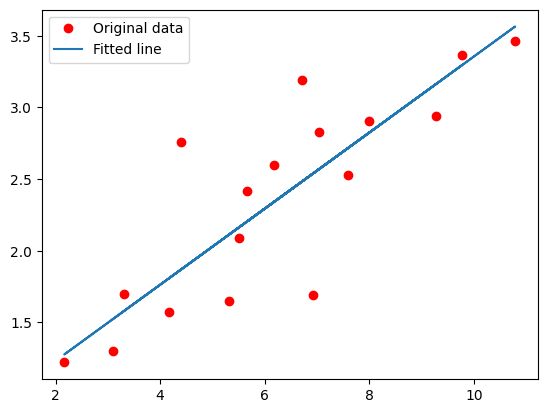

In [13]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## 2D linear regression

In [1]:
import  tensorflow as tf
import  numpy as np
from    tensorflow import keras
import  os

class Regressor(keras.layers.Layer):

    def __init__(self):
        super(Regressor, self).__init__()

        # here must specify shape instead of tensor !
        # name here is meanless !
        # [dim_in, dim_out]
        self.w = self.add_variable('meanless-name', [13, 1])
        # [dim_out]
        self.b = self.add_variable('meanless-name', [1])

        print(self.w.shape, self.b.shape)
        print(type(self.w), tf.is_tensor(self.w), self.w.name)
        print(type(self.b), tf.is_tensor(self.b), self.b.name)


    def call(self, x):

        x = tf.matmul(x, self.w) + self.b

        return x

In [4]:
def main():

    tf.random.set_seed(22)
    np.random.seed(22)
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    assert tf.__version__.startswith('2.')


    (x_train, y_train), (x_val, y_val) = keras.datasets.boston_housing.load_data()
    #
    x_train, x_val = x_train.astype(np.float32), x_val.astype(np.float32)
    # (404, 13) (404,) (102, 13) (102,)
    print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
    # Here has two mis-leading issues:
    # 1. (x_train, y_train) cant be written as [x_train, y_train]
    # 2.
    db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
    db_val = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(102)


    model = Regressor()
    criteon = keras.losses.MeanSquaredError()
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)

    for epoch in range(200):

        for step, (x, y) in enumerate(db_train):

            with tf.GradientTape() as tape:
                # [b, 1]
                logits = model(x)
                # [b]
                logits = tf.squeeze(logits, axis=1)
                # [b] vs [b]
                loss = criteon(y, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        print(epoch, 'loss:', loss.numpy())


        if epoch % 10 == 0:

            for x, y in db_val:
                # [b, 1]
                logits = model(x)
                # [b]
                logits = tf.squeeze(logits, axis=1)
                # [b] vs [b]
                loss = criteon(y, logits)

                print(epoch, 'val loss:', loss.numpy())

In [5]:
main()

(404, 13) (404,) (102, 13) (102,)
(404, 13) (404,) (102, 13) (102,)


C:\Users\erkun\AppData\Local\Temp\ipykernel_23248\3519797190.py:14: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  self.w = self.add_variable('meanless-name', [13, 1])
C:\Users\erkun\AppData\Local\Temp\ipykernel_23248\3519797190.py:16: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  self.b = self.add_variable('meanless-name', [1])


(13, 1) (1,)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> True meanless-name:0
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> True meanless-name:0
0 loss: 906.79474
0 val loss: 775.85004
1 loss: 264.68497
2 loss: 83.546936
3 loss: 107.61782
4 loss: 137.67105
5 loss: 110.584854
6 loss: 75.376564
7 loss: 51.315697
8 loss: 43.530155
9 loss: 38.982094
10 loss: 36.185665
10 val loss: 89.19365
11 loss: 33.983345
12 loss: 31.618694
13 loss: 29.169277
14 loss: 26.614948
15 loss: 24.81907
16 loss: 23.39144
17 loss: 22.365078
18 loss: 21.561752
19 loss: 20.952972
20 loss: 20.54677
20 val loss: 67.85405
21 loss: 20.300837
22 loss: 20.196703
23 loss: 20.196255
24 loss: 20.276192
25 loss: 20.425243
26 loss: 20.632702
27 loss: 20.886019
28 loss: 21.170124
29 loss: 21.472748
30 loss: 21.78503
30 val loss: 57.42205
31 loss: 22.100874
32 loss: 22.415888
33 loss: 22.72546
34 loss: 23.025192
35 loss: 23.311962
36 loss: 23.583622
37 loss: 23.83889
38 loss: